## Experiment 2: Comparison between k-medoids, Fast k-medoids and Fold Fast k-medoids (section 3.3)

In [4]:
import os, sys, random, pickle
from datetime import datetime
from zoneinfo import ZoneInfo  
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from PyDistances.quantitative import robust_maha_dist_matrix
from sklearn_extra.cluster import KMedoids
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower

sns.set_style('whitegrid')

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', '..', 'src')
config_path = os.path.join(current_path, '..', '..', 'config')

sys.path.append(src_path)
sys.path.append(config_path)

from experiments_utils import (make_experiment_2, 
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables,
                               avg_results_to_dfs,
                               split_list_in_chunks,
                               )

from config_experiment_2 import get_config as get_config_exp_2

In [5]:
experiment_2_config = get_config_exp_2()

In [ ]:
models = {
    'KMedoids-euclidean': KMedoids(n_clusters=experiment_2_config['n_clusters'], 
                                   metric='euclidean', 
                                   method=experiment_2_config['method'], 
                                   init=experiment_2_config['init'], 
                                   max_iter=experiment_2_config['max_iter'], 
                                   random_state=experiment_2_config['random_state']),

    'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples']),


    'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FoldFastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples'],
            n_splits=experiment_2_config['n_splits'], 
            shuffle=experiment_2_config['shuffle'], 
            kfold_random_state=experiment_2_config['kfold_random_state']) 

}

model_names = list(models.keys())

In [ ]:
n_realizations = 100
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

chunk_size = 3
random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
os.makedirs(results_folder_path, exist_ok=True)
file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')

In [ ]:
for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks'), start=0):
    print("chunk_id:", chunk_id)
    print('random_state_chunk:', random_state_chunk)

    results = {}

    for random_state in random_state_chunk:
        print('random_state:', random_state)
                        
        results[random_state] = make_experiment_2(
                n_samples_list = experiment_2_config['n_samples_list'], 
                models = models, 
                random_state = random_state
                )
            
    # Save results
    results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)
        
# Time 100 realization: 
## IBiDat server: 946 mins

chunks:   0%|          | 0/34 [00:00<?, ?chunks/s]

chunk_id: 0
random_state_chunk: [6863, 35084, 11427]
random_state: 6863
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.98s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.82s/it]


random_state: 35084
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.81s/it]


random_state: 11427
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.96s/it]


30000


chunks:   3%|▎         | 1/34 [17:58<9:53:03, 1078.27s/chunks]

chunk_id: 1
random_state_chunk: [53377, 34937, 14116]
random_state: 53377
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 34937
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.80s/it]


random_state: 14116
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:   6%|▌         | 2/34 [39:28<10:41:32, 1202.88s/chunks]

chunk_id: 2
random_state_chunk: [5000, 49692, 70281]
random_state: 5000
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 49692
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 70281
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:   9%|▉         | 3/34 [58:05<10:01:21, 1163.91s/chunks]

chunk_id: 3
random_state_chunk: [73704, 43541, 44669]
random_state: 73704
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 43541
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.81s/it]


random_state: 44669
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  12%|█▏        | 4/34 [1:18:56<9:59:05, 1198.20s/chunks]

chunk_id: 4
random_state_chunk: [6802, 20927, 17702]
random_state: 6802
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.80s/it]


random_state: 20927
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.80s/it]


random_state: 17702
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.96s/it]


30000


chunks:  15%|█▍        | 5/34 [1:44:01<10:32:34, 1308.78s/chunks]

chunk_id: 5
random_state_chunk: [44199, 73526, 43751]
random_state: 44199
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 73526
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]


random_state: 43751
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  18%|█▊        | 6/34 [2:07:55<10:30:37, 1351.34s/chunks]

chunk_id: 6
random_state_chunk: [91971, 32134, 21466]
random_state: 91971
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 32134
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 21466
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  21%|██        | 7/34 [2:28:44<9:52:59, 1317.76s/chunks] 

chunk_id: 7
random_state_chunk: [218, 57183, 11483]
random_state: 218
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 57183
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 11483
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  24%|██▎       | 8/34 [2:50:40<9:30:53, 1317.43s/chunks]

chunk_id: 8
random_state_chunk: [78328, 49492, 9158]
random_state: 78328
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 49492
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 9158
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  26%|██▋       | 9/34 [3:11:54<9:03:16, 1303.85s/chunks]

chunk_id: 9
random_state_chunk: [864, 41347, 95949]
random_state: 864
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 41347
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 95949
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


30000


chunks:  29%|██▉       | 10/34 [3:32:32<8:33:23, 1283.48s/chunks]

chunk_id: 10
random_state_chunk: [58762, 13374, 5752]
random_state: 58762
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 13374
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 5752
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  32%|███▏      | 11/34 [3:53:43<8:10:33, 1279.71s/chunks]

chunk_id: 11
random_state_chunk: [12158, 87443, 18635]
random_state: 12158
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 87443
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 18635
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  35%|███▌      | 12/34 [4:16:15<7:57:11, 1301.44s/chunks]

chunk_id: 12
random_state_chunk: [16547, 2783, 38247]
random_state: 16547
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 2783
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 38247
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  38%|███▊      | 13/34 [4:39:03<7:42:37, 1321.77s/chunks]

chunk_id: 13
random_state_chunk: [56444, 75157, 62511]
random_state: 56444
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 75157
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 62511
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  41%|████      | 14/34 [4:59:54<7:13:29, 1300.49s/chunks]

chunk_id: 14
random_state_chunk: [34776, 61511, 4816]
random_state: 34776
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 61511
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 4816
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  44%|████▍     | 15/34 [5:23:12<7:01:03, 1329.66s/chunks]

chunk_id: 15
random_state_chunk: [39989, 45018, 68376]
random_state: 39989
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 45018
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 68376
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  47%|████▋     | 16/34 [5:44:12<6:32:40, 1308.91s/chunks]

chunk_id: 16
random_state_chunk: [63302, 27113, 79810]
random_state: 63302
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 27113
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 79810
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  50%|█████     | 17/34 [6:05:12<6:06:40, 1294.15s/chunks]

chunk_id: 17
random_state_chunk: [83723, 69084, 74031]
random_state: 83723
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 69084
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 74031
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  53%|█████▎    | 18/34 [6:28:20<5:52:36, 1322.29s/chunks]

chunk_id: 18
random_state_chunk: [41322, 1644, 52197]
random_state: 41322
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 1644
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 52197
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  56%|█████▌    | 19/34 [6:50:14<5:29:55, 1319.72s/chunks]

chunk_id: 19
random_state_chunk: [84692, 67207, 56935]
random_state: 84692
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 67207
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 56935
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  59%|█████▉    | 20/34 [7:13:21<5:12:41, 1340.11s/chunks]

chunk_id: 20
random_state_chunk: [89762, 70584, 83670]
random_state: 89762
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 70584
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 83670
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:  62%|██████▏   | 21/34 [7:35:01<4:47:41, 1327.84s/chunks]

chunk_id: 21
random_state_chunk: [87380, 78185, 63718]
random_state: 87380
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 78185
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 63718
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  65%|██████▍   | 22/34 [7:56:06<4:21:47, 1309.00s/chunks]

chunk_id: 22
random_state_chunk: [68237, 87617, 54984]
random_state: 68237
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 87617
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:23<00:00,  4.74s/it]


random_state: 54984
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]


30000


chunks:  68%|██████▊   | 23/34 [8:19:41<4:05:48, 1340.79s/chunks]

chunk_id: 23
random_state_chunk: [49089, 66855, 4173]
random_state: 49089
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:12<00:00,  2.50s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:23<00:00,  4.69s/it]


random_state: 66855
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.35s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.38s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:31<00:00,  6.33s/it]


random_state: 4173
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.09s/it]


30000


chunks:  71%|███████   | 24/34 [8:58:03<4:31:32, 1629.30s/chunks]

chunk_id: 24
random_state_chunk: [98850, 84600, 23784]
random_state: 98850
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:31<00:00,  6.32s/it]


random_state: 84600
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:33<00:00,  6.78s/it]


random_state: 23784
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]


30000


chunks:  74%|███████▎  | 25/34 [9:38:47<4:41:05, 1873.90s/chunks]

chunk_id: 25
random_state_chunk: [95135, 10827, 63819]
random_state: 95135
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]


random_state: 10827
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.22s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.67s/it]


random_state: 63819
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]


30000


chunks:  76%|███████▋  | 26/34 [10:17:50<4:28:36, 2014.61s/chunks]

chunk_id: 26
random_state_chunk: [86255, 34326, 22298]
random_state: 86255
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.42s/it]


random_state: 34326
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.34s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.68s/it]


random_state: 22298
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.77s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.72s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


30000


chunks:  79%|███████▉  | 27/34 [11:04:34<4:22:40, 2251.51s/chunks]

chunk_id: 27
random_state_chunk: [43896, 44160, 72640]
random_state: 43896
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.13s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]


random_state: 44160
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:24<00:00,  4.83s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:36<00:00,  7.31s/it]


random_state: 72640
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


30000


chunks:  82%|████████▏ | 28/34 [11:41:39<3:44:20, 2243.44s/chunks]

chunk_id: 28
random_state_chunk: [51274, 9606, 94779]
random_state: 51274
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:24<00:00,  4.89s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:23<00:00,  4.70s/it]


random_state: 9606
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.34s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.56s/it]


random_state: 94779
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.71s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]


30000


chunks:  85%|████████▌ | 29/34 [12:24:38<3:15:20, 2344.07s/chunks]

chunk_id: 29
random_state_chunk: [59869, 50810, 75126]
random_state: 59869
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:30<00:00,  6.11s/it]


random_state: 50810
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:35<00:00,  7.17s/it]


random_state: 75126
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


30000


chunks:  88%|████████▊ | 30/34 [13:11:43<2:45:53, 2488.46s/chunks]

chunk_id: 30
random_state_chunk: [44054, 2137, 24780]
random_state: 44054
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:24<00:00,  4.98s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:30<00:00,  6.20s/it]


random_state: 2137
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


random_state: 24780
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:12<00:00,  2.58s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:23<00:00,  4.69s/it]


30000


chunks:  91%|█████████ | 31/34 [13:59:59<2:10:32, 2610.75s/chunks]

chunk_id: 31
random_state_chunk: [76834, 11554, 82354]
random_state: 76834
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.26s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.06s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.74s/it]


random_state: 11554
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.72s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.35s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:24<00:00,  4.96s/it]


random_state: 82354
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.15s/it]


30000


chunks:  94%|█████████▍| 32/34 [14:42:22<1:26:20, 2590.18s/chunks]

chunk_id: 32
random_state_chunk: [47646, 1681, 46126]
random_state: 47646
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:31<00:00,  6.30s/it]


random_state: 1681
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:32<00:00,  6.40s/it]


random_state: 46126
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


30000


chunks:  97%|█████████▋| 33/34 [15:32:39<45:18, 2718.24s/chunks]  

chunk_id: 33
random_state_chunk: [30032]
random_state: 30032
KMedoids-euclidean
5000
10000
20000
30000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.82s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:23<00:00,  4.65s/it]


30000


chunks: 100%|██████████| 34/34 [15:46:02<00:00, 1669.49s/chunks]


In [ ]:
# Open results by chunk
chunk_ids = range(len(random_state_list_chunks))
results_chunk = {}
file_id = '20250905_173311'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
for chunk_id in chunk_ids:
    #results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'rb') as f:
        results_chunk[chunk_id] = pickle.load(f)

# Join results by chunks
results = {}
for i in chunk_ids:
    results.update(results_chunk[i])  

# Save joined/merged results 
results_filename = f'results_exp_2_{file_id}.pkl'
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'wb') as f:
    pickle.dump(results, f)

In [2]:
# Open merged/joined results 

file_id = '20250905_173311'
results_filename = f'results_exp_2_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

---
---


In [7]:
from sklearn_extra.cluster import KMedoids
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower

models = {

    'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples']),


    'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FoldFastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples'],
            n_splits=experiment_2_config['n_splits'], 
            shuffle=experiment_2_config['shuffle'], 
            kfold_random_state=experiment_2_config['kfold_random_state']) 

}

In [10]:
n_realizations = 100
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

chunk_size = 3
random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
os.makedirs(results_folder_path, exist_ok=True)
file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')
file_id = '20251022_144921'

In [11]:
for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks, desc='chunks', unit='chunks'), start=0):
    print("chunk_id:", chunk_id)
    print('random_state_chunk:', random_state_chunk)

    results = {}

    for random_state in random_state_chunk:
        print('random_state:', random_state)
                        
        results[random_state] = make_experiment_2(
                n_samples_list = experiment_2_config['n_samples_list'], 
                models = models, 
                random_state = random_state
                )
            
    # Save results
    results_filename = f'new_results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)

chunks:   0%|          | 0/34 [00:00<?, ?chunks/s]

chunk_id: 0
random_state_chunk: [6863, 35084, 11427]
random_state: 6863
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.82s/it]


random_state: 35084
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 11427
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:   3%|▎         | 1/34 [03:19<1:49:56, 199.90s/chunks]

chunk_id: 1
random_state_chunk: [53377, 34937, 14116]
random_state: 53377
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 34937
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 14116
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:   6%|▌         | 2/34 [06:37<1:45:45, 198.31s/chunks]

chunk_id: 2
random_state_chunk: [5000, 49692, 70281]
random_state: 5000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 49692
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 70281
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:   9%|▉         | 3/34 [09:55<1:42:36, 198.58s/chunks]

chunk_id: 3
random_state_chunk: [73704, 43541, 44669]
random_state: 73704
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 43541
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 44669
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:  12%|█▏        | 4/34 [13:13<1:39:08, 198.29s/chunks]

chunk_id: 4
random_state_chunk: [6802, 20927, 17702]
random_state: 6802
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 20927
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 17702
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  15%|█▍        | 5/34 [16:30<1:35:35, 197.79s/chunks]

chunk_id: 5
random_state_chunk: [44199, 73526, 43751]
random_state: 44199
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 73526
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 43751
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  18%|█▊        | 6/34 [19:46<1:31:56, 197.02s/chunks]

chunk_id: 6
random_state_chunk: [91971, 32134, 21466]
random_state: 91971
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 32134
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.80s/it]


random_state: 21466
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  21%|██        | 7/34 [23:02<1:28:32, 196.77s/chunks]

chunk_id: 7
random_state_chunk: [218, 57183, 11483]
random_state: 218
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 57183
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 11483
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:  24%|██▎       | 8/34 [26:21<1:25:31, 197.36s/chunks]

chunk_id: 8
random_state_chunk: [78328, 49492, 9158]
random_state: 78328
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 49492
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 9158
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  26%|██▋       | 9/34 [29:37<1:22:03, 196.96s/chunks]

chunk_id: 9
random_state_chunk: [864, 41347, 95949]
random_state: 864
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 41347
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 95949
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


30000


chunks:  29%|██▉       | 10/34 [32:54<1:18:52, 197.17s/chunks]

chunk_id: 10
random_state_chunk: [58762, 13374, 5752]
random_state: 58762
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.79s/it]


random_state: 13374
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 5752
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  32%|███▏      | 11/34 [36:12<1:15:39, 197.36s/chunks]

chunk_id: 11
random_state_chunk: [12158, 87443, 18635]
random_state: 12158
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 87443
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 18635
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  35%|███▌      | 12/34 [39:27<1:12:03, 196.54s/chunks]

chunk_id: 12
random_state_chunk: [16547, 2783, 38247]
random_state: 16547
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 2783
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 38247
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  38%|███▊      | 13/34 [42:41<1:08:34, 195.94s/chunks]

chunk_id: 13
random_state_chunk: [56444, 75157, 62511]
random_state: 56444
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 75157
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 62511
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  41%|████      | 14/34 [45:56<1:05:12, 195.61s/chunks]

chunk_id: 14
random_state_chunk: [34776, 61511, 4816]
random_state: 34776
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 61511
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 4816
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  44%|████▍     | 15/34 [49:11<1:01:52, 195.38s/chunks]

chunk_id: 15
random_state_chunk: [39989, 45018, 68376]
random_state: 39989
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 45018
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 68376
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  47%|████▋     | 16/34 [52:27<58:40, 195.60s/chunks]  

chunk_id: 16
random_state_chunk: [63302, 27113, 79810]
random_state: 63302
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 27113
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 79810
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


chunks:  50%|█████     | 17/34 [55:43<55:26, 195.70s/chunks]

chunk_id: 17
random_state_chunk: [83723, 69084, 74031]
random_state: 83723
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 69084
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 74031
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  53%|█████▎    | 18/34 [58:59<52:10, 195.65s/chunks]

chunk_id: 18
random_state_chunk: [41322, 1644, 52197]
random_state: 41322
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 1644
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 52197
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  56%|█████▌    | 19/34 [1:02:13<48:50, 195.39s/chunks]

chunk_id: 19
random_state_chunk: [84692, 67207, 56935]
random_state: 84692
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 67207
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.78s/it]


random_state: 56935
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  59%|█████▉    | 20/34 [1:05:29<45:34, 195.33s/chunks]

chunk_id: 20
random_state_chunk: [89762, 70584, 83670]
random_state: 89762
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 70584
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 83670
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


30000


chunks:  62%|██████▏   | 21/34 [1:08:44<42:19, 195.34s/chunks]

chunk_id: 21
random_state_chunk: [87380, 78185, 63718]
random_state: 87380
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 78185
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 63718
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  65%|██████▍   | 22/34 [1:11:59<39:01, 195.14s/chunks]

chunk_id: 22
random_state_chunk: [68237, 87617, 54984]
random_state: 68237
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 87617
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 54984
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  68%|██████▊   | 23/34 [1:15:14<35:47, 195.18s/chunks]

chunk_id: 23
random_state_chunk: [49089, 66855, 4173]
random_state: 49089
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 66855
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 4173
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  71%|███████   | 24/34 [1:18:29<32:30, 195.10s/chunks]

chunk_id: 24
random_state_chunk: [98850, 84600, 23784]
random_state: 98850
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 84600
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 23784
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.10s/it]


30000


chunks:  74%|███████▎  | 25/34 [1:21:44<29:16, 195.13s/chunks]

chunk_id: 25
random_state_chunk: [95135, 10827, 63819]
random_state: 95135
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 10827
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 63819
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  76%|███████▋  | 26/34 [1:25:01<26:05, 195.68s/chunks]

chunk_id: 26
random_state_chunk: [86255, 34326, 22298]
random_state: 86255
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 34326
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 22298
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  79%|███████▉  | 27/34 [1:28:16<22:47, 195.34s/chunks]

chunk_id: 27
random_state_chunk: [43896, 44160, 72640]
random_state: 43896
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.73s/it]


random_state: 44160
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 72640
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  82%|████████▏ | 28/34 [1:31:31<19:31, 195.27s/chunks]

chunk_id: 28
random_state_chunk: [51274, 9606, 94779]
random_state: 51274
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 9606
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.73s/it]


random_state: 94779
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  85%|████████▌ | 29/34 [1:34:45<16:14, 194.98s/chunks]

chunk_id: 29
random_state_chunk: [59869, 50810, 75126]
random_state: 59869
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 50810
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 75126
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  88%|████████▊ | 30/34 [1:38:01<13:00, 195.16s/chunks]

chunk_id: 30
random_state_chunk: [44054, 2137, 24780]
random_state: 44054
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 2137
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 24780
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  91%|█████████ | 31/34 [1:41:16<09:45, 195.22s/chunks]

chunk_id: 31
random_state_chunk: [76834, 11554, 82354]
random_state: 76834
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


random_state: 11554
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]


random_state: 82354
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks:  94%|█████████▍| 32/34 [1:44:30<06:30, 195.01s/chunks]

chunk_id: 32
random_state_chunk: [47646, 1681, 46126]
random_state: 47646
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.77s/it]


random_state: 1681
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


Clustering Folds: 100%|██████████| 5/5 [00:13<00:00,  2.75s/it]


random_state: 46126
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


30000


chunks:  97%|█████████▋| 33/34 [1:47:46<03:15, 195.31s/chunks]

chunk_id: 33
random_state_chunk: [30032]
random_state: 30032
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
30000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


30000


chunks: 100%|██████████| 34/34 [1:48:52<00:00, 192.12s/chunks]


In [12]:
# Open results by chunk
chunk_ids = range(len(random_state_list_chunks))
results_chunk = {}
file_id = '20251022_144921'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
for chunk_id in chunk_ids:
    results_filename = f'new_results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'rb') as f:
        results_chunk[chunk_id] = pickle.load(f)

# Join results by chunks
results = {}
for i in chunk_ids:
    results.update(results_chunk[i])  

# Save joined/merged results 
results_filename = f'new_results_exp_2_{file_id}.pkl'
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'wb') as f:
    pickle.dump(results, f)

In [13]:
# Open merged/joined new results 

file_id = '20251022_144921'
results_filename = f'new_results_exp_2_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    new_results = pickle.load(f)

In [14]:
# Open merged/joined results 

file_id = '20250905_173311'
results_filename = f'results_exp_2_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/fabio/fabio_scielzo_ortiz/paper-2-code/experiments/simulations/../../results/results_experiment_2/results_exp_2_20250905_173311.pkl'

In [ ]:
def update_results(results, new_results):

    for random_state in new_results.keys():
        for metric in new_results[random_state].keys():
            results[random_state][metric].update(new_results[random_state][metric])

In [ ]:
update_results(results, new_results)

---

----

In [ ]:
pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_2_config['n_samples_list'], 
                                  iterable2 = model_names)

avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                  iterable1 = experiment_2_config['n_samples_list'], 
                                  iterable2 = model_names)

dfs = avg_results_to_dfs(avg_results, column_1='n_samples', column_2='model_name')

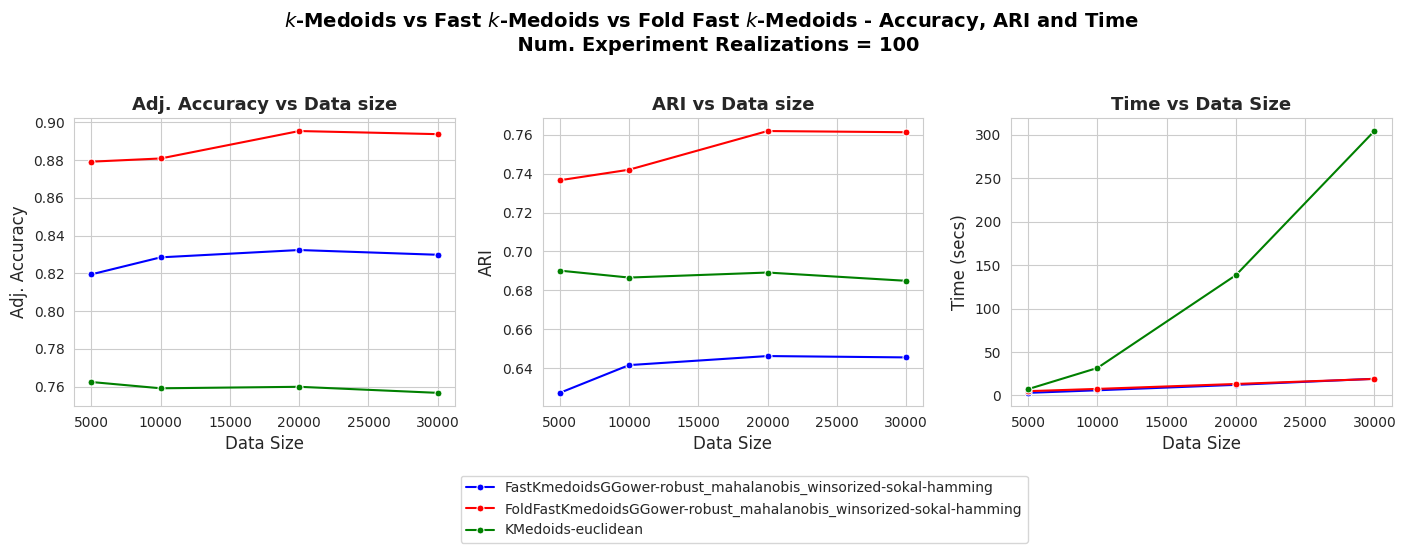

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(17,4))
axes = axes.flatten()  

#######################################################################
# Accuracy plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'KMedoids-euclidean'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])


#######################################################################
# ARI plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='blue', marker='o',  markersize=5, 
             label='Robust Fast $k$-medoids', ax=axes[1])

################################

model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='red', marker='o',  markersize=5, 
             label='Robust Fast $k$-medoids', ax=axes[1])

################################

model_name = 'KMedoids-euclidean'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='green', marker='o',  markersize=5, 
             label='$k$-medoids', ax=axes[1])


#######################################################################
# Time plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

################################


model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

################################

model_name = 'KMedoids-euclidean'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

#######################################################################
# Plot details

axes[0].set_title('Adj. Accuracy vs Data size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
#min_acc = min([min(best_accuracy[model].values()) for model in model_names])
#max_acc = max([max(best_accuracy[model].values()) for model in model_names])
#axes[0].set_yticks(np.round(np.linspace(min_acc, max_acc, 6),3))

axes[1].set_title('ARI vs Data size', size=13, weight='bold')
axes[1].set_ylabel('ARI', size=12)


axes[2].set_title('Time vs Data Size', size=13, weight='bold')
axes[2].set_ylabel('Time (secs)', size=12)
#min_time = min([min([x for x in times[model].values() if x != None]) for model in model_names])
#max_time = max([max([x for x in times[model].values() if x != None]) for model in model_names])
#axes[1].set_yticks(np.round(np.linspace(min_time, max_time, 6),3))

for i in range(len(axes)):
    #axes[i].set_xticks(data_sizes + [25000, 35000, 45000])
    axes[i].set_xlabel('Data Size', size=12)
    axes[i].legend().set_visible(False)

handles, labels = axes[2].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(-0.7, -0.5), ncol=1, fontsize=10)
plt.subplots_adjust(top=0.83)
plt.suptitle('$k$-Medoids vs Fast $k$-Medoids vs Fold Fast $k$-Medoids - Accuracy, ARI and Time\n  Num. Experiment Realizations = 100', fontsize=14, y=1.1, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

plot_filename = f'results_experiment_2_{file_id}_with_ARI.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

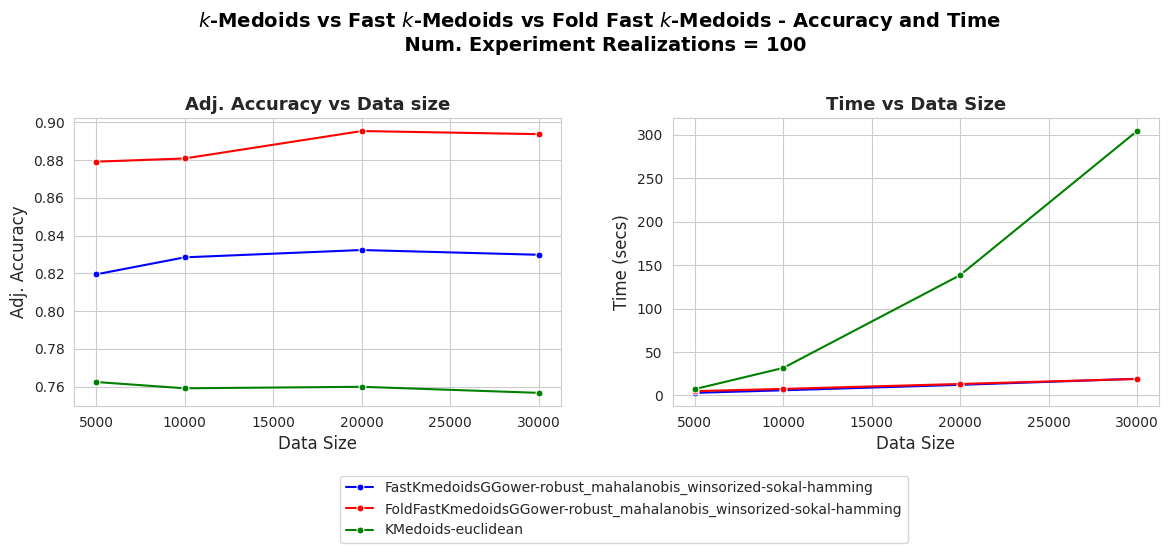

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes = axes.flatten()  

#######################################################################
# Accuracy plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'KMedoids-euclidean'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])


#######################################################################
# Time plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[1])

################################


model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[1])

################################

model_name = 'KMedoids-euclidean'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[1])

#######################################################################
# Plot details

axes[0].set_title('Adj. Accuracy vs Data size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
#min_acc = min([min(best_accuracy[model].values()) for model in model_names])
#max_acc = max([max(best_accuracy[model].values()) for model in model_names])
#axes[0].set_yticks(np.round(np.linspace(min_acc, max_acc, 6),3))

axes[1].set_title('Time vs Data Size', size=13, weight='bold')
axes[1].set_ylabel('Time (secs)', size=12)
#min_time = min([min([x for x in times[model].values() if x != None]) for model in model_names])
#max_time = max([max([x for x in times[model].values() if x != None]) for model in model_names])
#axes[1].set_yticks(np.round(np.linspace(min_time, max_time, 6),3))

for i in range(len(axes)):
    #axes[i].set_xticks(data_sizes + [25000, 35000, 45000])
    axes[i].set_xlabel('Data Size', size=12)
    axes[i].legend().set_visible(False)

handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(-0.1, -0.5), ncol=1, fontsize=10)
plt.subplots_adjust(top=0.83)
plt.suptitle('$k$-Medoids vs Fast $k$-Medoids vs Fold Fast $k$-Medoids - Accuracy and Time\n  Num. Experiment Realizations = 100', fontsize=14, y=1.1, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

plot_filename = f'results_experiment_2_{file_id}.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

In [15]:
dfs['adj_accuracy']

,n_samples,model_name,adj_accuracy
0,5000,KMedoids-euclidean,0.762466
1,5000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.819496
2,5000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.879160
3,10000,KMedoids-euclidean,0.759146
4,10000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.828494
5,10000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.880854
6,20000,KMedoids-euclidean,0.759938
7,20000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.832369
8,20000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.895381
9,30000,KMedoids-euclidean,0.756732


In [ ]:
dfs['ARI']

In [16]:
dfs['time']

,n_samples,model_name,time
0,5000,KMedoids-euclidean,7.301091
1,5000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,3.007878
2,5000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,4.953024
3,10000,KMedoids-euclidean,31.626128
4,10000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,5.965723
5,10000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,7.558553
6,20000,KMedoids-euclidean,138.360835
7,20000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,12.212250
8,20000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,13.217172
9,30000,KMedoids-euclidean,304.082560
